Running nodes in paralel

In [1]:
from langchain_openai import ChatOpenAI

from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END
from IPython.display import Image, display


In [ ]:
import os
from dotenv import load_dotenv
load_dotenv()

llm = ChatOpenAI(
    model=os.getenv("LLM_MODEL", "gpt-4o-mini"),
    api_key=os.getenv("OPENAI_API_KEY"),

)

In [3]:
class State(TypedDict):
    topic: str
    joke: str
    story: str
    poem: str
    combined: str

In [4]:
def write_joke(state: State) -> State:
    msg = llm.invoke(f"Write a joke about {state['topic']}")
    return {'joke': msg.content}

def generate_story(state: State) -> State:
    msg = llm.invoke(f"Write a story about {state['topic']}")
    return {'story': msg.content}

def generate_poem(state: State) -> State:
    msg = llm.invoke(f"Write a poem about {state['topic']}")
    return {'poem': msg.content}

In [5]:
def aggregate(state: State) -> State:
    combined = f"Joke: {state['joke']}\n\nStory: {state['story']}\n\nPoem: {state['poem']}"
    return {'combined': combined}

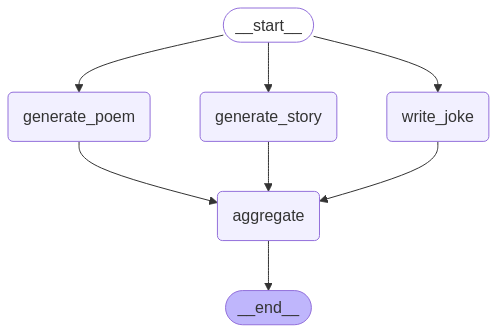

In [7]:
# Build workflow
parallel_graph = StateGraph(State)

# add nodes
parallel_graph.add_node("write_joke", write_joke)
parallel_graph.add_node("generate_story", generate_story)
parallel_graph.add_node("generate_poem", generate_poem)
parallel_graph.add_node("aggregate", aggregate)

# add edges to connect nodes
parallel_graph.add_edge(START, "write_joke")
parallel_graph.add_edge(START, "generate_story")
parallel_graph.add_edge(START, "generate_poem")


parallel_graph.add_edge("write_joke", "aggregate")
parallel_graph.add_edge("generate_story", "aggregate")
parallel_graph.add_edge("generate_poem", "aggregate")


parallel_graph.add_edge("aggregate", END)

chain = parallel_graph.compile()


display(Image(chain.get_graph().draw_mermaid_png()))



In [8]:
state = chain.invoke({"topic": "dog"})
print('Joke: ', state['joke'])
print('-'*100)  
print('Story: ', state['story'])
print('-'*100)
print('Poem: ', state['poem'])
print('-'*100)
print('Combined: ', state['combined'])



Joke:  Why did the dog sit in the shade?

Because he didn’t want to become a hot dog! 🐶🌭
----------------------------------------------------------------------------------------------------
Story:  Once upon a time in a small village nestled between rolling hills and a sparkling river, there lived a scruffy golden retriever named Max. Max belonged to an elderly woman named Mrs. Thompson, who had lived in the village for as long as anyone could remember. She was known for her kind heart and delicious baked goods, but in recent years, she had grown lonely since her husband passed away.

Every morning, Max would accompany Mrs. Thompson as she tended to her garden filled with vibrant flowers and fragrant herbs. He loved the sun on his fur and the sound of the birds singing in the trees, but most of all, he loved spending time with his beloved owner. Mrs. Thompson often talked to him as if he were her dear friend, sharing her stories, dreams, and worries. Max would listen intently, his tail